In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
!nvidia-smi

Sat Mar 25 11:49:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.56       Driver Version: 526.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0    N/A /  N/A |    260MiB /  4096MiB |     73%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w= torch.tensor(1.0 , requires_grad = True)
#Forward pass
y_hat = w*x

loss = (y_hat - y)**2

In [6]:
loss

tensor(1., grad_fn=<PowBackward0>)

In [7]:
#backward pass
loss.backward()


In [8]:
w.grad

tensor(-2.)

In [9]:
#update weights
#forward pass

In [10]:
# Gradient descent in action
#example f = 3* x
X = torch.tensor([2,3,4,5], dtype= torch.float32)
Y = torch.tensor([6,9,12,15],dtype = torch.float32)
w = torch.tensor([4],dtype = torch.float32 , requires_grad = True)
def forward(X, w):
    return X * w

def loss(X, Y , w):
    y_hat = forward(X,w)
    return ((y_hat - Y )**2).mean()

n_epoch = 20
lr = 0.01



In [11]:
for epoch in range(n_epoch):
    l = loss(X, Y , w)
    print(f'epoch = {epoch + 1} , loss = {l} , w = {w}')
    
    l.backward()
    with torch.no_grad():
        w -= lr*w.grad
    #zero gradients
    
    w.grad.zero_()
    

epoch = 1 , loss = 13.5 , w = tensor([4.], requires_grad=True)
epoch = 2 , loss = 7.194149971008301 , w = tensor([3.7300], requires_grad=True)
epoch = 3 , loss = 3.8337650299072266 , w = tensor([3.5329], requires_grad=True)
epoch = 4 , loss = 2.043013095855713 , w = tensor([3.3890], requires_grad=True)
epoch = 5 , loss = 1.088721752166748 , w = tensor([3.2840], requires_grad=True)
epoch = 6 , loss = 0.5801805853843689 , w = tensor([3.2073], requires_grad=True)
epoch = 7 , loss = 0.309177964925766 , w = tensor([3.1513], requires_grad=True)
epoch = 8 , loss = 0.16476109623908997 , w = tensor([3.1105], requires_grad=True)
epoch = 9 , loss = 0.08780111372470856 , w = tensor([3.0806], requires_grad=True)
epoch = 10 , loss = 0.0467890202999115 , w = tensor([3.0589], requires_grad=True)
epoch = 11 , loss = 0.024933816865086555 , w = tensor([3.0430], requires_grad=True)
epoch = 12 , loss = 0.013287181034684181 , w = tensor([3.0314], requires_grad=True)
epoch = 13 , loss = 0.00708076823502779 ,

## Raw Model

In [19]:
import torch
import torch.nn as nn


# implementing own model with inbuilt loss functions
X = torch.tensor([[2],[3],[4],[5]], dtype= torch.float32)
Y = torch.tensor([[6],[9],[12],[15]],dtype = torch.float32)

no_samples, no_features = X.shape
print(no_samples , no_features)

input_size = no_features
output_size = no_features



learn_index = 0.01
n_epoch = 1000
X_test = torch.tensor([6],dtype = torch.float32 )

#Model 

#model = nn.Linear(input_size, output_size )
class LinearRegression(nn.Module):
    def __init__(self, input_dim , output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim , output_dim)
        
    def forward(self , x):
        return self.lin(x)

    
model = LinearRegression(input_size, output_size)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr = learn_index)
initial_value = model(X_test).item()

print(f"initial value : {initial_value:.3f}" )

for epoch in range(n_epoch):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    [w,b] = model.parameters()
    if (epoch + 1) % 100 == 0: 
        print(f'epoch = {epoch + 1} , loss = {l} , w = {w[0][0].item()} , base = {b[0].item()}')
 
final_value = model(X_test).item()    
print(f"final value : {final_value:.3f}" )

4 1
initial value : -0.683
epoch = 100 , loss = 0.0030659923795610666 , w = 2.9526097774505615 , base = 0.18161681294441223
epoch = 200 , loss = 0.002166664693504572 , w = 2.9601621627807617 , base = 0.15267302095890045
epoch = 300 , loss = 0.0015310903545469046 , w = 2.9665110111236572 , base = 0.1283418983221054
epoch = 400 , loss = 0.0010819598101079464 , w = 2.9718480110168457 , base = 0.1078883484005928
epoch = 500 , loss = 0.0007645766017958522 , w = 2.976334571838379 , base = 0.09069442003965378
epoch = 600 , loss = 0.0005403143004514277 , w = 2.9801058769226074 , base = 0.07624107599258423
epoch = 700 , loss = 0.00038180931005626917 , w = 2.9832763671875 , base = 0.064090795814991
epoch = 800 , loss = 0.00026982041890732944 , w = 2.9859416484832764 , base = 0.05387704446911812
epoch = 900 , loss = 0.00019067544781137258 , w = 2.9881818294525146 , base = 0.04529088735580444
epoch = 1000 , loss = 0.0001347462530247867 , w = 2.990065336227417 , base = 0.03807343915104866
final val

## Linear Regression

In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#prepare dataset
X_numpy,  y_numpy = datasets.make_regression(n_samples= 100 , n_features=1 , noise= 20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))

y = torch.from_numpy(y_numpy.astype(np.float32))




<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
y.shape

torch.Size([100])

In [6]:
y = y.view(y.shape[0], 1)

In [7]:
#create model

In [8]:
n_samples,n_features = X.shape
input_size = n_features
output_size = 1


In [9]:
model = nn.Linear(input_size, output_size)


In [10]:
#loss and optimizers

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

In [13]:

#training loop

In [21]:
n_iter = 1000
#print("initial loss :" )
for epoch in range(n_iter):
    #forward 
    Y_pred = model(X)
    #calculate loss
    loss = criterion(Y_pred,y)
    #backpropogation
    loss.backward()
    
    #update weights
    optimizer.step()
    #reset to zero 
    optimizer.zero_grad()
    [w,b] = model.parameters()
    if (epoch + 1) % 100 == 0: 
        print(f'epoch = {epoch + 1} , loss = {loss:.4f} , w = {w[0][0].item():.4f} , base = {b[0].item():.4f}')
 

epoch = 100 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 200 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 300 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 400 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 500 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 600 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 700 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 800 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 900 , loss = 332.5676 , w = 82.4847 , base = 4.0540
epoch = 1000 , loss = 332.5676 , w = 82.4847 , base = 4.0540


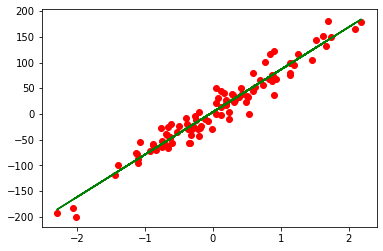

In [23]:
#Prediction
predicted = model(X).detach().numpy()
plt.plot(X_numpy , y_numpy, "ro" )
plt.plot(X_numpy , predicted , "g")
plt.show()


## Logistic Regression

In [71]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
# Load Dataset

bc = datasets.load_breast_cancer()
X,y = bc.data,bc.target

n_samples, n_features = X.shape

In [73]:
n_features

30

In [74]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 2)

In [75]:
#scale feature Make 0 mean data and unit standard deviation , always recommended for logistic regression

sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [76]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1) 

In [77]:
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression , self).__init__()
        #define layers
        
        self.linear1 = nn.Linear(n_features , 1)
    
    def forward(self , x):
        y_pred = torch.sigmoid(self.linear1(x))
        return y_pred

    
model = LogisticRegression(n_features)


In [78]:
##Define loss and optimizer

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [79]:
## Training loop

In [80]:
n_epoch = 100

for epoch in range(n_epoch):
    #forward 
    y_predicted = model(X_train)
    loss = criterion(y_predicted , y_train)
    #backward
    loss.backward()
    #update
    
    optimizer.step()
    
    #Empty gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 10== 0: 
        print(f'epoch = {epoch + 1} , loss = {loss.item():.4f}')
    
    

epoch = 10 , loss = 0.5964
epoch = 20 , loss = 0.4864
epoch = 30 , loss = 0.4199
epoch = 40 , loss = 0.3754
epoch = 50 , loss = 0.3432
epoch = 60 , loss = 0.3186
epoch = 70 , loss = 0.2991
epoch = 80 , loss = 0.2831
epoch = 90 , loss = 0.2697
epoch = 100 , loss = 0.2582


In [81]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9386
